In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 단일 사진 클래스 개수 확인

Unique pixel values in label image: [0 1]
Counts for each value: [1032725   15851]


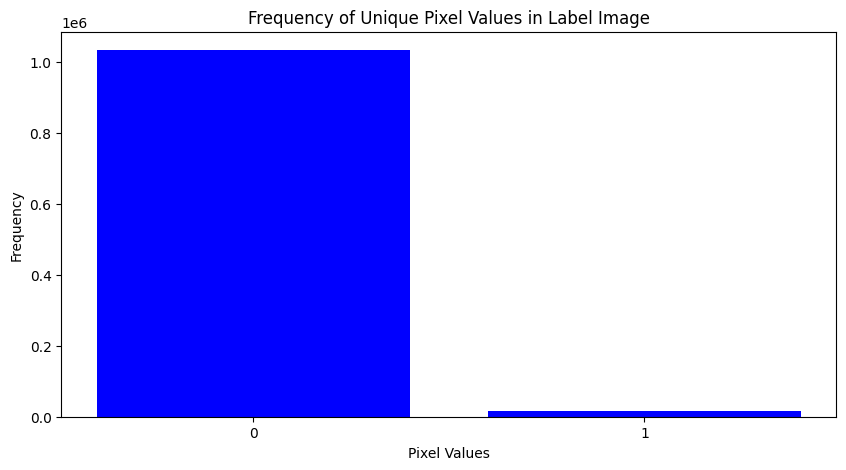

In [5]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# 파일 경로(사진경로)
label_image_path = '/content/guatemala-volcano_00000000_pre_disaster_target.png'

# 이미지 로드
label_image = Image.open(label_image_path)

# 이미지를 numpy 배열로 변환
label_image_array = np.array(label_image)

# 레이블 이미지의 고유값과 분포 시각화
unique, counts = np.unique(label_image_array, return_counts=True)

# 고유값 분포를 프린트
print("Unique pixel values in label image:", unique)
print("Counts for each value:", counts)

# 고유값에 대한 빈도 수를 바 차트로 시각화
plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.bar(unique, counts, color='blue')  # 바 차트 생성
plt.xlabel('Pixel Values')  # x축 라벨
plt.ylabel('Frequency')  # y축 라벨
plt.title('Frequency of Unique Pixel Values in Label Image')  # 그래프 제목
plt.xticks(unique)  # x축의 눈금을 고유값으로 설정
plt.show()  # 그래프 표시


# 전체 훈련데이터(pre_disaster) 클래스 분포 확인

In [ ]:
!tar -xvf '/content/drive/MyDrive/Colab_Notebooks/xBD/train_images_labels_targets.tar' -C '/content/'

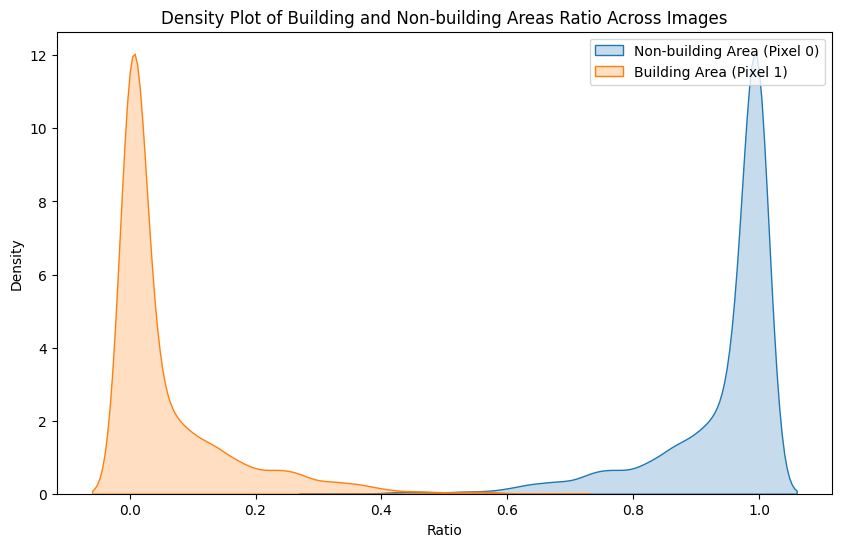

In [17]:
import seaborn as sns
from scipy import stats

target_dir = 'train/targets'

target_img_paths = sorted([ os.path.join(target_dir, fname)
                           for fname in os.listdir(target_dir)
                           if fname.endswith('pre_disaster_target.png')])

# 각 이미지에 대한 비율 데이터 저장
ratios_zero = []
ratios_one = []

# 각 이미지를 순회하면서 픽셀 값 0과 1의 비율 계산
for img_path in target_img_paths:
    label_image = Image.open(img_path)
    label_image_array = np.array(label_image)

    # 픽셀 값 0과 1의 수 계산
    total_pixels = label_image_array.size
    count_zero = np.count_nonzero(label_image_array == 0)
    count_one = np.count_nonzero(label_image_array == 1)

    # 각 픽셀 값의 비율 계산
    ratio_zero = count_zero / total_pixels
    ratio_one = count_one / total_pixels

    # 결과 저장
    ratios_zero.append(ratio_zero)
    ratios_one.append(ratio_one)

# 결과를 분포 그래프로 표시
plt.figure(figsize=(10, 6))
sns.kdeplot(ratios_zero, fill=True, label='Non-building Area (Pixel 0)')
sns.kdeplot(ratios_one, fill=True, label='Building Area (Pixel 1)')

plt.xlabel('Ratio')
plt.ylabel('Density')
plt.title('Density Plot of Building and Non-building Areas Ratio Across Images')
plt.legend()

plt.show()

# 정리

그래프 해석:
주황색 커브 (건물 영역, 픽셀 값 1):
주황색 커브가 낮은 비율(0.2 이하)에서 높은 밀도를 보이고 있습니다. 이는 많은 이미지에서 건물이 차지하는 비율이 적다는 것을 의미합니다. 데이터셋의 이미지 대부분이 비건물 영역이 더 많은 지역에서 촬영된 것일 수 있습니다.
파란색 커브 (비건물 영역, 픽셀 값 0):
파란색 커브가 높은 비율(0.8 이상)에서 높은 밀도를 보이는 것은 많은 이미지에서 비건물 영역이 전체 이미지의 대부분을 차지하고 있음을 나타냅니다. 이는 녹지나 비건축 지역이 넓게 퍼져 있는 지역의 이미지들이 포함되어 있을 가능성이 높습니다.
데이터 분석 및 모델 개선에 대한 제안:
데이터 불균형: 주황색 커브가 낮은 비율에서 높은 밀도를 보이는 것은 건물이 적은 이미지가 많다는 뜻이므로, 모델이 건물을 더 잘 감지하도록 특별한 주의가 필요합니다. 데이터 증강이나 리샘플링을 통해 건물이 많이 포함된 이미지의 비율을 증가시킬 수 있습니다.
모델 훈련 전략: 건물 영역이 적은 이미지가 많다면, 건물을 정확히 감지하기 위한 모델의 민감도를 높이는 방향으로 모델을 조정할 필요가 있습니다. 이를 위해 모델의 손실 함수에 클래스 가중치를 적용하거나, 보다 세밀한 특성 추출 기술을 사용할 수 있습니다.
평가 메트릭스 선택: 건물 영역의 비율이 낮은 이미지가 많을 경우, 정확도만으로 모델 성능을 평가하는 것은 적절하지 않을 수 있습니다. 이러한 경우 F1 스코어, 정밀도, 재현율과 같은 다른 평가 지표들을 고려해 보는 것이 좋습니다.